# **Lecture 18 - Web Scraping**

---

<br>

### Packages

In [ ]:
# load rvest library (already installed in colab!)
library(rvest)

---

<br>

### What is Web Scraping?

* Thus far, we have analyzed data that is available in a tabular format through various file types (e.g., `.csv`, `.txt`, `.xlsx`, etc.)

* We have also learned to import data stored in a non-tabular but structured (nested) format (`.json`)
* However, sometimes we require data for our analysis that is not readily available in an "easy-to-access" structured format

* Specifically, the data you require may be included on a website
* It turns out we can access the website code to "scrape" the data we need

* The process of automatically extracting data from websites is known as ***web scraping***

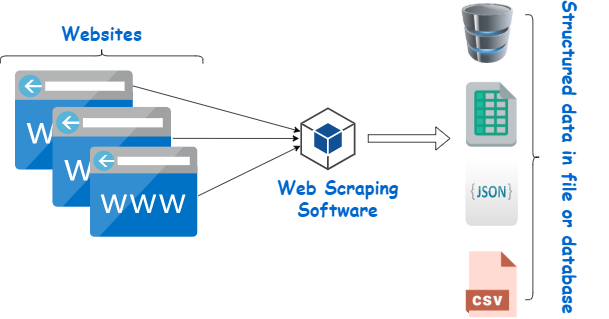

---

<br>

### Websites and HTML

* To scrape data from a website, we need a basic understanding of HTML
  * We do not need to know how to code in HTML
  * You just need to know how to navigate it!
* HTML or HyperText Markup Language is a language used to create and structure webpages
* HTML code defines the content and layout of a webpage

* HTML is written as a hierarchical/nested structure of content

* Below is an example of a very simple website written in HTML

  ```
  <html>
      <head>
          <title>My First Webpage</title>
      </head>
      <body>
          <h1>Welcome to STAT 200: Introduction to Data Science with R!</h1>
          <p>This is a paragraph of text.</p>
          <a class = "website" href="https://www.sdsu.edu">Click here</a>
      </body>
  </html>
  ```

* Browsers essentially process websites in this (HTML) format and display the content for browsing

* We can actually view the basic webpage above in our browser!

#### Why is this relevant?

* It turns out, when visiting a webpage, you can also access their source HTML code

* To scrape data from a webpage, we import the HTML code into `R`

* We then use functions to "scrape" the desired information from the html code

* The example below "scrapes" the SDSU url from the HTML file

  ```
  <html>
      <head>
          <title>My First Webpage</title>
      </head>
      <body>
          <h1>Welcome to STAT 200: Introduction to Data Science with R!</h1>
          <p>This is a paragraph of text.</p>
          <a class = "website" href="https://www.sdsu.edu">Click here</a>
      </body>
  </html>
  ```

In [ ]:
# import the html content
url <- "https://raw.githubusercontent.com/khasenst/datasets_teaching/refs/heads/main/basic_html.html"
html <- read_html(url)

# show the contents of the html file
cat(as.character(html))
# output : 

````
<!DOCTYPE html PUBLIC "-//W3C//DTD HTML 4.0 Transitional//EN" "http://www.w3.org/TR/REC-html40/loose.dtd">
<html>
<head>
<meta http-equiv="Content-Type" content="text/html; charset=UTF-8">
<title>My First Webpage</title>
</head>
<body>
        <h1>Welcome to My Website</h1>
        <p>This is a paragraph of text.</p>
        <a href="https://www.sdsu.edu">Click here</a>
    </body>
</html>
````

In [ ]:
# extract contents of <body> and <a> tags
body_tag <- html_elements(html, "body a")

# extract the "href" attribute of the tag
html_attr(body_tag, "href")
# output : 'https://www.sdsu.edu'

---

<br>

### Basic HTML Vocabulary

  ```
  <html>
      <head>
          <title>My First Webpage</title>
      </head>
      <body>
          <h1>Welcome to STAT 200: Introduction to Data Science with R!</h1>
          <p>This is a paragraph of text.</p>
          <a class = "website" href="https://www.sdsu.edu">Click here</a>
      </body>
  </html>
  ```

* **tag** - Any item with the `<>` syntax (i.e. `<tag>`)
  * `<html>`, `<head>`, `<body>`, `<h1>`, `<p>`, `<a>` are all tags
  * `</html>`, `</head>`, `</body>`, `</h1>`, `</p>`, `</a>` are all tags

* **opening tag** - A tag without the forward slash `/`
  * `<html>`, `<head>`, `<body>`, `<h1>`, `<p>`, `<a>` are all opening tags

* **closing tag** - A tag with the forward slash `/`
  * `</html>`, `</head>`, `</body>`, `</h1>`, `</p>`, `</a>` are all closing tags

* **element/node** - Tags and content within other opening/closing tags are called elements or nodes
  * `<p>This is a paragraph inside a div.</p>` is a child element of the `<body>` element

* **attribute** - information that modifies an element in the starting tag
  * `href` is an attribute of the `<a>` element containing a website, which is the attributes value

* **class** - an attribute that allows you to apply formatting/styling to elements
  * The `<a>` element contains a class will value `"website"`

* **text** - Any content inside a tag's element but not explicitly part of the tag. It is the content that is seen on the webpage.
  * `Welcome to My Website` is the text within the element `<h1>`

---

<br>

### Basic Web Scraping using the `rvest` Package

* To introduce the concept of web scraping, we will the following website as a working example

  https://rvest.tidyverse.org/articles/starwars.html

* Our goal is to scrape relevant information about each Star Wars film and populate a data table

#### Exploring the Webpage and HTML Code

* Before jumping into scraping a website, it is a good idea to view the page and explore the site's HTML code

* We can do this a few ways

  * Approach 1: Open the webpage of interest, right click on the page, and select "View page source"
  * Approach 2: Press `F12` on your keyboard
  * Approach 3: Import the HTML content into `R` and explore

#### Importing the source HTML using `read_html()`

* We can import the HTML content from the website using the function `read_html(x)`

  * `x` : the url to the website



In [ ]:
# load HTML content
url <- "https://rvest.tidyverse.org/articles/starwars.html"
html <- read_html(url)

class(html)
#output :     'xml_document''xml_node'

* To verify we have loaded the HTML content correctly, we can use `as.character()` to convert the object to a `character` data type

* We then use `cat()` to print the `string`

In [ ]:
cat(as.character(html))
#output :  output the whole html file as a string

---

<br>

#### Accessing elements using `html_elements()`

* Let's first attempt to scrape the titles of each Star Wars film

* Based on the HTML file, we see that the titles for each film are within the `<section>` tag
* We can extract elements by their tag name using the `html_elements(x, css)`

  * `x`   : HTML document or extracted element
  * `css` : the tag name containing the elements you would like to extract
* The script belows extracts all elements from every parent element with tag `<section>`

* The output is a list of child elements from each `<section>` tag

* We see there are a total of 7 movies (this website is old!)
* Let's take a look at the first list item

* It appears each list item contains the content we need from each film

* We can now use `html_elements()` again to extract the child element with the tag `<h2>`

* Note that we can consolidate the extraction of elements by including tags in a single command

* Here, we include "section" and "h2" in the same command and have the same result
* We now have the titles, but we need a function to extract the text from the `<h2>` elements

In [ ]:
# Extract the content in the "section" tag -> returns 'xml_nodeset'
section_elements <- html_elements(x = html, css = "section")
section_elements
# output : with each section in the website


# extract content from first item with the tag "section" -> returns 'xml_node'
section_elements[[1]]
#output : each tag in the first section of the website

# extract content from first item with the tag "section" -> returns 'xml_nodeset'
title_elements <- html_elements(section_elements, "h2")
title_elements
#output : each h2 title inside of a section


# extract the titles in a single command -> returns 'xml_nodeset' IN ONE STEP
title_elements <- html_elements(html, "section h2")
title_elements
#output : each h2 title inside of a section

---

<br>

#### Extracting text using `html_text()`

* To extract text from an element, we use the `html_text(x, trim)` function

  * `x`    : element or node
  * `trim` : if `TRUE`, will trim extra white space; default is `FALSE`
  * When setting `trim = TRUE`, the extra newline white space (`"\n"`) is removed
* We now have our titles!

In [ ]:
# extract titles from the <h2> tag with white space
titles <- html_text(title_elements, trim = FALSE)
print(titles)
#output :  "\nThe Phantom Menace\n" ....


# extract titles from the <h2> tag without white space
titles <- html_text(title_elements, trim = TRUE)
print(titles)
#output : "The Phantom Menace"  ...

---

<br>

#### Accessing a `class` using `html_elements()`

* Earlier, we extracted the elements on each Star Wars movie using the `<section>` tag and the `html_elements()` function

* In contrast to extracting information by the tag name, we can also use `html_elements()` to extract information using the `class` name

* To extract information using the `class` name, we simply place a period in front of the `class` name
* For example, the first element of `section_elements` below contains director information on the first Star Wars film

* We can extract the element that includes director information using the following script

* Note the period `"."` in the string `".director"`, which specifies extraction based on the class name, NOT the tag name
* We can then extract the text as before using `html_text()`

* Now we have the directors!

In [ ]:
# sections extracted using html_elements
section_elements
#output :  with each section in the website

# first element of the extracted sections
section_elements[[1]]
#output : each tag in the first section of the website

# extract director information using the class
director_elements <- html_elements(section_elements, ".director")
director_elements
#output : <span class="director">George Lucas</span>,  <span class="director">George Lucas</span>,...

directors <- html_text(director_elements)
print(directors)
#output : "George Lucas" "George Lucas"     "George Lucas"     "George Lucas"  "Irvin Kershner"   "Richard Marquand" "J. J. Abrams" 
   

---

<br>

#### Extracting attributes of elements using `html_attr()`

* Thus far, we have extracted elements by tag name of class using `html_elements()`

* We have also extracted text from an element using `html_text()`

* But what if we want to extract attributes from an element
  (Remember, an attribute is information that modifies an element within the starting tag)

* For example, what if we want the `data-id`?

* To extract the attribute value from an attribute, we use the `html_attr(x, name)` function

  * `x`    : element or node
  * `name` : attribute name containing the value we want to extract

  * We first extract the element containing the attribute `data-id`

* We then use `html_attr()` to extract the attribute value


In [ ]:
# content of first section element
section_elements[[1]]
#output : each tag in the first section of the website

# this extracts all h2 elements -> returns 'xml_nodeset'
h2_elements <- html_elements(section_elements, "h2")
h2_elements
#output : <h2 data-id="1">\nThe Phantom Menace\n</h2>...

# use html_attr to extract data-id attribute values -> returns char
data_ids <- html_attr(h2_elements, "data-id")
print(data_ids)
#output : "1" "2" "3" "4" "5" "6" "7"

---

<br>

#### Extracting tables using `html_table()`

* Sometimes websites already contain data in tabular format, but the data table is embedded within the html file

* For example, website below has several tables containing information on the Star Wars films
  https://en.wikipedia.org/wiki/List_of_Star_Wars_films

* The HTML elements containing these tables are denoted by the `<table>` tag

* We can see this if we right click and select "View the page"
* The script below loads the HTML file, then searches for all elements with the `<table>` tag

* We see that there are 20 elements with the `<table>` tag

* It turns out that we can extract these tables using the `html_table(x)` function
  * `x` : HTML elements

* The function `html_table()` searches the html elements for the `<table>` tag and conveniently converts them into data frame

* If there are multiple tables in the HTML document, then `html_table()` outputs an unstructured list of data frames
* Exploring the tables, we see that there are 20!
* Perhaps we are only interested in the table of release dates

* Lets extract only the first table

* But this is the table on the top right of the webpage
* Lets extract only the second table

In [ ]:
# load html from webpage
url <- "https://en.wikipedia.org/wiki/List_of_Star_Wars_films"
html <- read_html(url)

# extract all <table> elements -> returns xml_nodeset 
table_elements <- html_elements(html, "table")
table_elements
# output : lists out each table, with all of it's content


# extract all tables -> returns a list of all the tables
tables <- html_table(html)
tables 
# output : 

# print number of tables
length(tables) # output : 20 tables

html_table(html)[[1]] # output : a vector of 'tbl_df''tbl''data.frame'  with all of the information within the first table

# extract the second table from the table elements
films <- html_table(html)[[2]]
films # out put the info of the second table

---

<br>

#### Cleaning the Table

* The next steps would be to reorganize and clean the data using everything we learned about subsetting, strings, etc.

* For example, we can remove unwanted columns, change column names, extract the release date in a specific format using regular expressions etc.

In [ ]:
# rename columns
names(films) <- c("film", "release_date", "director", "writer",
                  "storyby", "producer", "reference")
films

film,release_date,director,writer,storyby,producer,reference
<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
Prequel trilogy,Prequel trilogy,Prequel trilogy,Prequel trilogy,Prequel trilogy,Prequel trilogy,Prequel trilogy
Episode I – The Phantom Menace,"May 19, 1999 (1999-05-19)",George Lucas,George Lucas,George Lucas,Rick McCallum,[3]
Episode II – Attack of the Clones,"May 16, 2002 (2002-05-16)",George Lucas,George Lucas and Jonathan Hales,George Lucas,Rick McCallum,[4][5]
Episode III – Revenge of the Sith,"May 19, 2005 (2005-05-19)",George Lucas,George Lucas,George Lucas,Rick McCallum,[6][7]
Original trilogy,Original trilogy,Original trilogy,Original trilogy,Original trilogy,Original trilogy,Original trilogy
Episode IV – A New Hope,"May 25, 1977 (1977-05-25)",George Lucas,George Lucas,George Lucas,Gary Kurtz,[8][9]
Episode V – The Empire Strikes Back,"May 21, 1980 (1980-05-21)",Irvin Kershner,Leigh Brackett and Lawrence Kasdan,George Lucas,Gary Kurtz,[10][11]
Episode VI – Return of the Jedi,"May 25, 1983 (1983-05-25)",Richard Marquand,Lawrence Kasdan and George Lucas,George Lucas,Howard Kazanjian,[12][13]
Sequel trilogy,Sequel trilogy,Sequel trilogy,Sequel trilogy,Sequel trilogy,Sequel trilogy,Sequel trilogy


In [ ]:
# remove last column
films <- films[,1:(ncol(films) - 1)]
films

film,release_date,director,writer,storyby,producer
<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
Prequel trilogy,Prequel trilogy,Prequel trilogy,Prequel trilogy,Prequel trilogy,Prequel trilogy
Episode I – The Phantom Menace,"May 19, 1999 (1999-05-19)",George Lucas,George Lucas,George Lucas,Rick McCallum
Episode II – Attack of the Clones,"May 16, 2002 (2002-05-16)",George Lucas,George Lucas and Jonathan Hales,George Lucas,Rick McCallum
Episode III – Revenge of the Sith,"May 19, 2005 (2005-05-19)",George Lucas,George Lucas,George Lucas,Rick McCallum
Original trilogy,Original trilogy,Original trilogy,Original trilogy,Original trilogy,Original trilogy
Episode IV – A New Hope,"May 25, 1977 (1977-05-25)",George Lucas,George Lucas,George Lucas,Gary Kurtz
Episode V – The Empire Strikes Back,"May 21, 1980 (1980-05-21)",Irvin Kershner,Leigh Brackett and Lawrence Kasdan,George Lucas,Gary Kurtz
Episode VI – Return of the Jedi,"May 25, 1983 (1983-05-25)",Richard Marquand,Lawrence Kasdan and George Lucas,George Lucas,Howard Kazanjian
Sequel trilogy,Sequel trilogy,Sequel trilogy,Sequel trilogy,Sequel trilogy,Sequel trilogy


In [ ]:
# find patterns with 4 digits - 2 digits - 2 digits
date_matches <- gregexpr("\\d{4}-\\d{2}-\\d{2}", films$release_date)
date_matches

[[1]]
[1] -1
attr(,"match.length")
[1] -1

[[2]]
[1] 15
attr(,"match.length")
[1] 10

[[3]]
[1] 15
attr(,"match.length")
[1] 10

[[4]]
[1] 15
attr(,"match.length")
[1] 10

[[5]]
[1] -1
attr(,"match.length")
[1] -1

[[6]]
[1] 15
attr(,"match.length")
[1] 10

[[7]]
[1] 15
attr(,"match.length")
[1] 10

[[8]]
[1] 15
attr(,"match.length")
[1] 10

[[9]]
[1] -1
attr(,"match.length")
[1] -1

[[10]]
[1] 20
attr(,"match.length")
[1] 10

[[11]]
[1] 20
attr(,"match.length")
[1] 10

[[12]]
[1] 20
attr(,"match.length")
[1] 10

In [ ]:
# extract those patterns
films$release_date <- as.character(regmatches(films$release_date, date_matches))

films

film,release_date,director,writer,storyby,producer
<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
Prequel trilogy,character(0),Prequel trilogy,Prequel trilogy,Prequel trilogy,Prequel trilogy
Episode I – The Phantom Menace,1999-05-19,George Lucas,George Lucas,George Lucas,Rick McCallum
Episode II – Attack of the Clones,2002-05-16,George Lucas,George Lucas and Jonathan Hales,George Lucas,Rick McCallum
Episode III – Revenge of the Sith,2005-05-19,George Lucas,George Lucas,George Lucas,Rick McCallum
Original trilogy,character(0),Original trilogy,Original trilogy,Original trilogy,Original trilogy
Episode IV – A New Hope,1977-05-25,George Lucas,George Lucas,George Lucas,Gary Kurtz
Episode V – The Empire Strikes Back,1980-05-21,Irvin Kershner,Leigh Brackett and Lawrence Kasdan,George Lucas,Gary Kurtz
Episode VI – Return of the Jedi,1983-05-25,Richard Marquand,Lawrence Kasdan and George Lucas,George Lucas,Howard Kazanjian
Sequel trilogy,character(0),Sequel trilogy,Sequel trilogy,Sequel trilogy,Sequel trilogy


In [ ]:
!grepl("trilogy", films$film)

[1] FALSE  TRUE  TRUE  TRUE FALSE  TRUE  TRUE  TRUE FALSE  TRUE  TRUE  TRUE

In [ ]:
# remove rows with the pattern "trilogy"
films <- films[!grepl("trilogy", films$film),]
films

film,release_date,director,writer,storyby,producer
<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
Episode I – The Phantom Menace,1999-05-19,George Lucas,George Lucas,George Lucas,Rick McCallum
Episode II – Attack of the Clones,2002-05-16,George Lucas,George Lucas and Jonathan Hales,George Lucas,Rick McCallum
Episode III – Revenge of the Sith,2005-05-19,George Lucas,George Lucas,George Lucas,Rick McCallum
Episode IV – A New Hope,1977-05-25,George Lucas,George Lucas,George Lucas,Gary Kurtz
Episode V – The Empire Strikes Back,1980-05-21,Irvin Kershner,Leigh Brackett and Lawrence Kasdan,George Lucas,Gary Kurtz
Episode VI – Return of the Jedi,1983-05-25,Richard Marquand,Lawrence Kasdan and George Lucas,George Lucas,Howard Kazanjian
Episode VII – The Force Awakens,2015-12-18,J. J. Abrams,"J. J. Abrams, Lawrence Kasdan and Michael Arndt","J. J. Abrams, Lawrence Kasdan and Michael Arndt","Kathleen Kennedy, J. J. Abrams and Bryan Burk"
Episode VIII – The Last Jedi,2017-12-15,Rian Johnson,Rian Johnson,Rian Johnson,Kathleen Kennedy and Ram Bergman
Episode IX – The Rise of Skywalker,2019-12-20,J. J. Abrams,Chris Terrio and J. J. Abrams,"Derek Connolly, Colin Trevorrow, J. J. Abrams and Chris Terrio","Kathleen Kennedy, J. J. Abrams and Michelle Rejwan"


---

<br>

| Function               | Use Case                                      |
|------------------------|-----------------------------------------------|
| `read_html()`          | Load the HTML content from a URL              |
| `html_elements()`      | Find all matching HTML tags or classes        |
| `html_text()`          | Extract readable content                      |
| `html_attr()`          | Pull out values of specific attributes        |
| `html_table()`         | Convert HTML `<table>` into a data frame      |

### Static vs Dynamic Websites

* Note that today's lecture only covered scraping data from what we call "static" websites

* A static website uses prebuilt files to display the web content to the viewer

* However, many websites are "dynamic", where the content changes dynamically based on user selection

* Scraping dynamic websites can be performed using a package called `RSelenium`

* This is much more complicated and out of the scope of this course!

* ...but if you learn it, you can use this approach for tasks such as purchasing concert tickets (like a bot) or reserving highly coveted camping sites

| Type     | Description                                                  | Tools       |
|----------|--------------------------------------------------------------|-------------|
| **Static**   | Content is part of the original HTML (scrape with `rvest`)  | `rvest`     |
| **Dynamic**  | Content appears only after interaction/JS execution        | `RSelenium` |

# Course Transcript

Hi class. So welcome to today's lecture, it's actually quite an interesting topic. Today. It's on web scraping. Okay. So to do any sort of web scraping. Typically, we just really need this package here, our vest.

so what exactly does it mean to scrape data from the web? Well, so far. What have we done? Well, we've analyzed data that's often available in some common format, right? And this format's typically a tabular format or table

stored in some sort of file, like a comma separated value file, which is the most common that we've encountered. There's text files as well as excel files.

We've also learned a little bit more about importing data that's in a non-tabular format such as a nested data structure. And we learned this in the context of something called Javascript object notation or Json.

The thing is, sometimes we actually require data that's not available in these formats.

Moreover, we might require data for an analysis, that's only available online on website. All right. So we're going to need to know how to scrape this data from a website.

Now, it turns out, you can actually access data or the code, the HTML code from a website. And we can scrape data from that web page. And this process of automatically extracting that data from these websites is called web scraping.

So this diagram shows that we might have websites here, and then we'll load those websites into our our quote unquote web scraping software. And once it's in our, we can run some code to extract the relevant data we need for our analysis and finally export it as a file that we're familiar with.

Okay, so just a bit of background on websites in HTML,

now to scrape data from a web page, we need a very basic understanding of HTML, you don't need to know how to code in HTML, although that is helpful. You just need to understand its basic structure. Okay, so we just need to know how to navigate it.

Now, what is HTML, well, it stands for hypertext markup language. And it's essentially a language used to create and structure different web pages. All right. So the HTML code defines the content as well as the layout of a web page.

There's a bit more to this. There's something called css, which goes with HTML, and specifies how you should style things like color and font, and so on.

We don't really need to know that there's also Javascript, which you know, creates fancier web pages. But we don't need to know that today we're going to just focus on this element of web pages called HTML,

all right. So HTML is basically written as a hierarchical structure

kind of similar to what we've seen with unstructured lists in R, except there are opening and closing sections that we'll talk about.

So here below in this little code cell is an example of a very, very simple website written in HTML, all right, you could see that we have an opening, what we call tag here, a closing tag.

and within that opening and closing tag. We have other tag. Right? So therefore it is a hierarchically structured sort of web page

or language.

Now, browsers what they do like the browser. I'm on Chrome or Firefox or safari. If you're on a Mac.

those browsers essentially process websites in this language, and then display the content for browsing. So how browsers work is! They send a request to some, you know, server, the server gives them back this web page, this code, and then the browser itself converts this code into what we actually see and work with. All right. So as an example here, I'm going to copy this code, I just press control. C, so I'm literally copying this.

And I'm going to open up some basic basic text editor this is notepad on a windows machine or text edit, if you're on a Mac Alright, so I'll just paste this here literally just copy and paste that code.

and I'm going to save it as

just webpage dot HTML, right? I want to save it as an HTML file

and I want it to be in dot HTML extension. Not a dot txt.

So if I save that right now, it's saved in that folder.

and if I go to that folder I could see my web page here.

and if I double click this.

it'll open that code inside my chrome browser

and show me the contents of that web page. Notice the web page looks nothing like that code. It's only showing me the contents that I want to show through the HTML code.

I've also included a hyperlink here which links us to the San Diego State website. And so on.

Okay, so you can actually view what the HTML code does.

Now, why is this all relevant? Right?

Well, it turns out that when you visit a web page you can actually access their source code.

right? So when you visit a web page, instead of viewing the actual web page. You can view this code

right?

And to scrape data from the web page, we actually access that code, load it into R, and then we scrape it, using some set of functions from that rvest package. Right? So as a quick example, and we'll go into this in depth.

This example below scrapes the Sdsu URL from this HTML file, and you could see the Sdsu URL is here right? It's not this click here, Link. It's literally this, URL,

so what we can do is load the web page

and I'll go into what this means in another video. But we load the web page here, and this is me just showing you that we have the content.

And then from there I can extract the URL.

Now expand this or extrapolate this to a large scale web scraping. This can be quite powerful because you can extract entire tables, sets of Urls, sets of data for your analysis that's available on a web page, and not in a common format like a Csv file.

All right. If we're going to be scraping data from the web specifically from HTML files, we're going to need to understand some vocabulary here, and I'm going to be mentioning these vocabulary words quite often throughout this lecture. So just bear with me. This is the same HTML code from the last video. And there are several components to an HTML file.

The first thing you'll notice is these less than and greater than signs containing text.

Anything within a less than and greater than sign like `html`, `head`, `title` — those are all called **tags**. So all of these items here are tags.

We're going to be using these tags to extract information within those tags. So if you want to extract information, you're going to be using the `title` tag, and so on.

You'll notice that some of the tags have a forward slash, and some don't.

Any tag without a forward slash indicates the start or **opening** of a tag — it opens a section. For example, `<head>` has no slash, so it's opening a head section.

Anything with a forward slash is a **closing tag**, which closes that section — like `</head>`.

So we have **tags**, **opening tags** (without a slash), and **closing tags** (with a slash).

Anything contained within a tag is called an **element**. The tags and content within opening and closing tags are called **elements** (also sometimes referred to as **nodes**, but I’ll use "elements" more often).

If you look at the `body` element, it includes everything inside the `<body>` and `</body>` tags.

For example, the entire paragraph tag `<p>...</p>` is an element **within** the body element.

Now, there’s something else called an **attribute**.

An attribute is any information that **modifies an element** in the starting tag.

For example, `<a href="https://sdsu.edu" class="website">Click here</a>` — in this anchor (`a`) element:

- `href` is an attribute (the hyperlink reference)
- Its **value** is the URL (`https://sdsu.edu`)
- `class` is another attribute with value `website`

The `class` attribute is special — it’s used to define styling rules (like in CSS). You’ll often see `class="..."` and it links to some style definition elsewhere, either in a CSS file or in a style section.

You don’t need to worry about the CSS right now, but just know that the class attribute is used to apply formatting or identify certain elements.

Then, we have **text**.

**Text** is the actual content inside an element — the stuff you **see** on a web page.

So, for the link example above, `Click here` is the **text** — it’s not part of the tag itself, but is between the opening and closing tags.

Another example is: `Welcome to STAT 200` — that is text inside a paragraph element.

Be careful not to confuse attribute values with text. For instance, `"website"` inside `class="website"` looks like text but is not — it's an attribute value, not page content.

And again, the entire thing `<a href="..." class="...">Click here</a>` is an `a` element. The paragraph `<p>Welcome to STAT 200</p>` is a `p` element inside the `body` element.

There’s a lot of vocabulary here — but we’ll keep using it, and it’ll become more familiar as we go along.

All right. So now let's jump right into scraping the web. All right. So to introduce this concept of scraping data from a website, we're going to be using this example website here. So I'm going to click on this link. And it essentially includes different information about the 1st 7 Star wars movies now, why, only the 1st 7 and not the 9

episodes or the other Offshoot Star Wars movies. Well, I think this was saved a while back in like 2015. So it's a little out of date. But that's fine. Alright.

So if I click this link.

this is the website, and we're going to want to scrape relevant information like the title, the Release date, the director, and the synopsis.

Now our goal is to again scrape relevant information about each Star Wars film. And we're going to populate an actual data table that you can use for reporting

all right. Now before jumping into all of the code. We need to scrape a website. It's a good idea to just get familiar with the actual HTML code. Remember, I said, that all websites are written in HTML, and the browser converts that HTML into something that we review visually right. But you can actually see the source code, and there are a few different ways. So the 1st way is to open the web page of interest right? And then right click

and then select view page source. So I'm gonna go back to that web page.

I'm going to right click and notice down here. And again, I'm on Google Chrome.

I'm going to select view page source.

And already you can see this extensive HTML file. You could see that P element here defining one of the lines within the synopsis of a movie.

If I keep scrolling down, you could see a title. This is Episode 2 of Star Wars, the release date, the director, which is the original creator, George Lucas, and so on. Okay, so that's pretty cool.

Let me just close that

alright. Another approach is to press. F. 12. Now I prefer the 1st approach when initially exploring the page in R or in on a web browser like chrome.

But the second approach is pretty neat, because you can actually dynamically select content. Alright. So I'm gonna go here. I'm gonna press F. 12 on my keyboard

and on chrome. This opens up this window. Now this window shows you all of the HTML code.

and it highlights the corresponding location on the web page that you're looking at.

Okay? So a way to locate that in this code is, say, I'm interested in this title, The Phantom Menace. I can right click.

And instead of view page source, I can say inspect. And it shows me the element where this is occurring. So later on you can use this to say, Well, I want to extract the titles. I want to know which HTML tag is being used to specify a title, and that's H. 2 within section. Okay.

but that's another way. You can explore this HTML code.

So I'm going to press F. 12 again and close that window right?

And the final approach is just to import it into R. Now, if we're going to be scraping the the website data. We're going to have to import it into R, anyway. Right? So the way we can do this is using something called the read underscore HTML function. This is part of the R vest package that we loaded earlier. Right? So we can import this content.

this web content here, right. All this, each, all of it, into our using. Read HTML. And all you need to provide is the URL. So we have our URL here, which is an active website on the Internet.

we'll say, read HTML, so I'm going to read all of the HTML code from this website.

Alright notice, it has a special data structure class called an Xml document. Now, you can consider HTML as Xml. I'm not going to go into Xml. It does stand for extensible markup language. So it's another markup language. But just know that when you're looking at a class document of Xml document, it's probably an HTML file.

Now to verify that we've actually loaded this HTML, content correctly from that website. What you would do is take all the contents of this document right stored in HTML,

because I've stored it here as the variable. HTML,

I'm going to convert that entire document into a character.

and then I'm going to print it, using this cat function all right. So I'm going to run the cell.

And you can see we have all of the contents

right? All of the contents of that HTML file. Now, within this variable, okay?

So we've loaded the data. And now we can actually access elements for data extraction.
All right. So now that we've loaded our HTML code into R, we can start scraping data from that HTML file using different functions from the Rfs package. And let's 1st attempt to just scrape the titles of each Star Wars film. All right. So if we go back

to the source, HTML code. Remember, we were looking at the different titles. Here's the 1st title from Episode one, The Phantom Menace, which came out in 1999. So quite a few years ago.

Right? And this title is within this section tag

and also within this H 2 tag.

So we want to extract this element, this section element using the section tag right in R, all right.

So again, based on that HTML file, we see that the titles for each film are within this tag called section.

and a function that we use to extract an element within a tag from an HTML file. Using R is a function called HTML elements. Right? So, a good way to remember this is this, extracts elements from HTML, okay.

Now, this takes 2 arguments of note. The 1st is X, which is just the document or element itself. I say element as well, because technically, the whole document is an element, and you could feed it sub elements as well. All right, and we'll get into that later.

And the second argument is called Css. And I would just call this the tag name right. It's the tag name containing all of the web elements you'd like to extract.

So let's see an example.

So this script below extracts all elements

from every parent element within the tag section. Right?

So we have this

tag section, which is an element and extracts all child elements from this parent element. Alright. So if you look at section, it ends here. So this is the entire section.

and we're going to extract all elements within that section element. So H. 2 PP. All the way down

to Div. And everything everything like that.

All right. So I'm going to say, HTML elements.

And I'm going to scrape HTML,

right? That's my document or extracted element.

And the tag name that I want is section

alright. So if I run this, I store it in this variable section elements. You see that?

There's a somewhat unstructured list. And you can consider this like an unstructured list type format. And we see that there are 7 total movies. And, as I said before, this website's a little bit old. So it doesn't account for the last 2 movies within this series of movies. Alright.

So all we've done is extracted the sub elements or child elements from the parent element section.

Now, since this appears to be an unstructured list, let's take a look at that 1st list item.

and remember the way we use numeric indexing to extract list items from an unstructured list. Is this double bracket?

Alright? So I'm gonna extract the 1st list item

from section elements, which is all of the elements within the section tag.

And it appears each list item contains the content we need for each film. All right. So we're going to focus on this section element.

And 1st of all, we're going to focus on H 2, because we want the title of these films alright.

So what we're going to do is use HTML elements again

to extract the child element H. 2.

From the parent element section.

Right? So what I'm gonna do here is use section elements.

Notice that I'm not extracting from the entire HTML file anymore.

I've extracted only the section element.

And then from these section elements, I'm going to extract the child element H, 2, which stands for a header. Okay?

And I'm going to store this in a variable called title elements.

So if I run that that extracts all of the H 2 elements

from my section elements. Okay, so if I go back again.

they're all the H 2 elements containing the titles from the section element.

If I scroll down more

again. H. 2 element from my section element. So that's the next name of the movie.

right? So I'm almost there. I do have all of the titles, but they're all within H, 2 elements here. Okay.

this is just showing you that we can actually consolidate

calling the different tags to call those elements by just separating each tag with a space.

So instead of extracting 1st the section element

and then extracting the H 2 element.

Since we know everything's in the H 2 element which is in section.

we can just simply say, All right. I want all the elements from the HTML. File within

section and H. 2, and then we get the same result.

Okay, so now we have the titles.

The thing is, we need a function to extract the text.

It's from these elements all right, and that brings us to HTML text.

Alright. So remember, text within a web page is any sort of strings that aren't part of the actual tags themselves. Okay? So if I go back to that HTML, you could see here that there's text here because it's not within the tag, right? 2 is not text, because it's part of the tag here it's within the less than and greater than sign.

But "Attack of the Clones" is not. This is what you actually see on the web page.

So if I go back to the web page, here's the text, right?

Okay.

So remember, before we had all of these elements containing the text of the films. But we don't want the entire element. We just want the text. So it turns out, there's a function called `html_text`, which extracts text from an element.

Okay?

It has 2 arguments of note. The 1st is `x`, which is the element you're feeding into the function. Right? So that would be

this thing here, `title_elements`.

Okay? And a second one would be `trim`, and `trim` simply trims the extra white space from the title. If you don't want those special characters defining different white space like tab, or enter like new lines and stuff like that. And as you can see, if we look at our `title_elements`, there are new lines here.

Okay.

So first, I'm going to extract the text from my `title_elements`. But I'm going to set `trim = FALSE`, which is the default value.

And you can see here we've successfully extracted the text containing the titles.

However, there's still white space here. There are ways we can get rid of it. But why not just use `trim = TRUE`.

So we're going to set `trim = TRUE`.

And now we have the titles. So we have all of the titles from each of the movies.

Okay.

Now, going forward, there's another function or the function `html_elements` can also extract a class. Right? So elements of a class. And this is because earlier, we extracted elements on each Star Wars movie using this `section` tag, right? But what if we don't want to extract elements by the section tag? What if we want to extract elements by their class name?

So this just shows those section elements that we extracted in the past.

So in contrast to extracting information by, say, the tag name, we can also extract elements from the HTML file using the class name.

The difference here is instead of just simply stating the tag like `section` or `h2`, like we did in the past, we need to place a period in front of the class name.

Okay? So here's an example.

Let's look at the 1st element of our `section_elements` here

and say, we want to extract the director, right? The director from this element here.

Well, instead of extracting all the `p` elements, we can extract all the elements where class is equal to `director`. And this will give us this element here. Okay.

So the way we do that again is, we need to place a period in front of the class name. So I'm going to say `html_elements`.

We're going to extract elements from all of my `section_elements` which I stored earlier

all the section elements where the class name is `director`

and because it's a class name, note the period. I'm placing a period right here

again. This is extracting all elements based on a class name, not the tag name.

So I'm going to run that line of code, and as you can see it extracted all of the elements. So we have a `span` tag element

containing this class with `director`, right?

So we've now extracted all the elements containing the director name. But again, we don't want the entire element. We just want the text from that element which is what you see on the website, right? This is the text.

So what we can do is use `html_text` again

to extract all of the text from my `director_elements` shown here.

So if I run that, I store it in the variable `directors`. We don't need to specify `trim = TRUE` here, because there is no white space.

Alright. So what have we covered? We know what an HTML element is. We know how to extract elements from an HTML file using `html_elements()` by their tag name. We know how to extract HTML elements using that same function using the class name with that extra period, and we know how to extract text from an element—right?—which is any information outside of that tag visible on your web page.

The thing is, what if we want to extract attributes from an element?

Remember, what is an attribute? It's just information that modifies an element within that tag. Right?

So let me just show you this example here.

`data-id`, right? This is an attribute, and its attribute value is "1" for this particular `h2` element. Okay, so what if we want to extract this string containing a 1? We want to extract this attribute value.

Well, there's a function called `html_attr()`, which stands for attribute.

And this function is used to extract attribute values with the attribute name from an element. Okay.

So the way this works is, we feed it an element or node.

And then we feed it the name of the attribute so that we can extract its corresponding value.

So in this case, I'm going to extract the attribute value `"1"` from the attribute `"data-id"`, which is just kind of a movie ID number. Alright.

So first, I'm going to extract using `html_elements()` the `h2` element.

Okay.

Now, let me just show you what's in here.

So you can see that we have all of these `h2` elements. Remember, we used this to extract the titles, but we don't want the title. What I want is the movie ID. So I want this string here. Now, what we can do is use `html_attr()`,

which takes all of these `h2` elements as input, and then I say, "give me the attribute value

of this attribute." So give me the `"1"` of the attribute `data-id`, and do this for all of the elements within the `h2_elements` variable. Okay.

So let me just run that.

And as you can see here, we have 1, 2, 3, 4, 5, 6, 7. This is just the ID for each movie. So we've successfully extracted the attribute value

from an attribute within an `h2` element using this function here. Alright. So we've done a lot already by extracting elements from a website, we've extracted elements based on class names from an HTML file as well as text.

Now, sometimes websites already contain data in tabular format. You still need to scrape it, but it's somewhat organized—yet the data is just embedded in this HTML file. It's not in a CSV format still.

So as an example, going to open this website here.

Right? This is the list of Star Wars films, just following that theme from the prior videos.

Now, the HTML elements containing the tables within this Wikipedia page—you could see tables here,

a table here, all of these different tables within the Wikipedia page.

So the HTML elements containing these tables—they’re all denoted by something called a `<table>` tag. And we can actually view the source HTML content just like before,

by right-clicking and selecting "View Page Source".

So if I right-click here and say "View Page Source"...

Right? We have our source HTML file. I can do a Control-F (or Command-F if you're on a Mac), search for the `<table>` tag, and you can see that there are several tables—several HTML elements with the table tag within this HTML file.

Alright. So our goal is to be able to extract those tables and organize them into data frames.

The script below loads the HTML file just like before.

Okay, so I’m going to load the HTML file here.

And then we’re going to use `html_elements()` to extract all of the elements in that file with a `<table>` tag.

So these are all the tables, and we can see there are 20 tables total.

Now, what’s nice is it turns out there's a function that can automatically extract the contents of these tables, ignoring all the unnecessary information we don’t need.

Right?

So there’s this function called `html_table()`.

And it takes some set of elements as input,

or the entire file. What the `html_table()` function does is it searches through all of the elements within the HTML file

with the tag name `<table>`, then it extracts the contents of that table

and then converts it into a data frame.

Now that is super convenient. It’s not perfect because there are formatting issues, but at least we won’t have to just extract information piece by piece using the functions we’ve covered in the prior video.

Now, if there are multiple tables—which there are—you can see several different tables here, here’s another table,

here’s another table—several different tables in that website.

Then what the `html_table()` function does is it loads all of the tables with the `<table>` tag and then organizes them into an unstructured list of data frames.

So what I’ll do here is I’m running `html_table()` on our HTML code.

R is then searching for all of the `<table>` tags to extract those elements and then converts that table content into data frames.

So you can see here we have...

16—that’s another table—17—that’s another table—and we have 20 tables total, because we have 20 table elements as shown up here.

So you could see that this is the first table containing relevant information on the director, and so on.

Alright.

Because it is an unstructured list, we can use the `length()` function to determine that there are 20 tables total.

And perhaps we’re only interested in a single table, and we’re interested particularly in the release dates of each movie.

Right? So let’s just extract the first table and see what this is.

If we extract it, we can see that it’s information on the "Directed by", and so on. The thing is, this isn’t the release dates. This is just other information.

You could see George Lucas—this is just a list of directors. And if I go back to the web page...

at the very top, you can see that this is simply the table on the top-right of the web page.

But really we want the dates. So you can look through, and it seems like we want the second table, because it has all of the release dates along with the actual films—the titles.

Right?

So what we’re going to do is we’ll extract the second table. So I’m going to say `html_table()`, I’m going to extract

all of the tables, and then only take the second list item, which is the second table.

And I’m going to store it in `films`. And as you can see already, it’s done a pretty good job of organizing this data frame—or organizing that HTML table content—into a data frame.

And what we’re interested in here is these years, and so on.

You can see that it’s not the perfect setup. So we’re going to have to do some data wrangling or data cleaning to clean this up, which we’ll do next.

Alright. So let's clean up the table that we've loaded into R using the `html_table()` function. This is the data frame we’d like to clean up.

First of all, there are some weird characters here in the title—there’s spacing—and let’s just rename each of the variable names.

So the next step would be to reorganize and clean or wrangle this data using all the stuff we learned about in the past.

First, I’m going to rename the variable names. So remember `names(films)`—this will give us the original variable names.

These are the original variable names with weird characters in them. I typically don’t want to use parentheses in a variable name.

So what I’m going to do is create a new character vector of variable names.

And I’m going to overwrite the original ones.

So I’ll just show the whole data frame.

Now we have our nice, new, and shiny variable names that are easy to read.

Next up—we don’t really need the reference column. So what I’m going to do is extract all columns except the last column and then overwrite the data frame. This is me just removing this reference column.

Alright. So I’m going to say: from the `films` data frame, I want all of the rows (that’s to the left of the comma), and to the right of the comma I want columns `1` through `ncol(films) - 1`.

So what this does—remember this is a vector—there are 7 columns here, but I’m extracting 1 through 7 minus 1, so 1 through 6. So I’m only going to extract the first 6 columns.

Removing this last column and storing this as `films`.

We’ve removed that last column. Things are looking a little more organized here, which is good.

Now I could use regular expressions to find any patterns with this date pattern.

So here I’m going to extract the dates. I’m going to say: use this `gregexpr()` expression. This function says: I’m going to find the location of all of these patterns within this column.

This is going back to our regular expressions lecture where I say: look into this column of release dates—this whole thing here—

and then I want you to find the first location of this pattern. Well, remember `\\d` is a digit, and I want the digit to be four digits. So that would be 2019, right? That’s a four-digit number, followed by a dash. So there’s a dash here, followed by a two-digit number,

followed by another two-digit number—a dash and a two-digit number.

You could see here there’s a “15” in the second row. The first row doesn’t have any date. That’s why there’s a `-1`. But if you look here: 1, 2, 3... all the way until 15—the 15th character is the start of that date pattern we’re searching for.

Then, remember from the regular expressions lecture—we can actually use `regmatches()` to extract this pattern.

So I’m going to use this, and I’m going to extract the pattern and overwrite the `release_date`. So if you look at the `release_date`, I’ve extracted that pattern and then I’ve overwritten the column so that now this is my `release_date`. So it’s looking a lot more organized.

Then finally, I can remove the trilogy rows here, because we don’t really need any rows describing the trilogies—we only want the movie listings.

So what I’m going to use is `grepl()`—or grep logical—which searches for the pattern `"trilogy"`.

So that’s this pattern here—it searches for that pattern within this column.

If I show you what that does—it’s a logical vector, which shows you `TRUE` whenever there’s "trilogy". So the first contains the pattern `"trilogy"`,

the last doesn’t—because it’s a movie title.

I’m going to use an exclamation point to invert that. Because I don’t want all of the trilogy rows—I want everything *but* the trilogy rows. So if I put an exclamation point (which is the symbol for the logical NOT operator),

it switches everything, and it only extracts the rows *without* the pattern `"trilogy"`.

So what I’m going to do is use this `!grepl()` to pull all the rows that do not have the pattern `"trilogy"` within it.

Then I’m going to overwrite `films`, and as you can see, it’s nice and neat. I have my `release_date`s here,

I don’t have those extra trilogy rows because I’ve removed them using `grepl()`,

and I’ve renamed all my variable names. It looks like this nice data frame ready for reporting or analysis.

Alright. So there’s one more small thing I do want to mention, and that is the distinction between static and dynamic websites. I just want to emphasize that today’s lecture only covered scraping data from what we would call **static websites**.

These are static websites.

A static website just uses pre-built files, and it displays static content—so the content doesn’t change. That’s the meaning of static.

So it uses pre-built files to display web content to the viewer that does not change.

The thing is, more and more often you’ll see websites that are **dynamic**. This is where the website content changes based on something you select on the web page.

Right?

So something like concert tickets—if you’re signing on and trying to buy concert tickets, you’re dynamically clicking around the website, and it’s popping up new fields

based on your selection.

Right?

So unfortunately, **scraping dynamic websites** is actually much more complicated and requires more powerful packages, something like **RSelenium**.

Right?

But you know enough now to somewhat learn how to explore that concept.

And what’s really cool about being able to scrape dynamic websites

is you can use that approach to do **web crawling**, right? So you can actually use R code to enter into a dynamic website, click around buttons—**using R code though**—so it automates it. And you could do things like **automatically purchasing concert tickets** right when the window opens, or reserving very highly coveted websites like say **to Yosemite**, which is so hard to get now.